In [1]:
import pandas as pd

/var/folders/4r/8l8ztg457hq357p0kylhwhfw0000gn/T/ipykernel_76409/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
zillow_county_zhvi_df = pd.read_csv('./data/zillow/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
pd.set_option('display.max_rows', 500)
zillow_county_zhvi_df.isna().sum()


RegionID                0
SizeRank                0
RegionName              0
RegionType              0
StateName               0
State                   0
Metro                1243
StateCodeFIPS           0
MunicipalCodeFIPS       0
2000-01-31           2040
2000-02-29           2038
2000-03-31           2036
2000-04-30           2034
2000-05-31           2031
2000-06-30           2029
2000-07-31           2028
2000-08-31           2026
2000-09-30           2025
2000-10-31           2024
2000-11-30           2021
2000-12-31           2020
2001-01-31           2007
2001-02-28           2006
2001-03-31           2003
2001-04-30           1999
2001-05-31           1997
2001-06-30           1995
2001-07-31           1993
2001-08-31           1990
2001-09-30           1987
2001-10-31           1984
2001-11-30           1981
2001-12-31           1979
2002-01-31           1974
2002-02-28           1974
2002-03-31           1974
2002-04-30           1962
2002-05-31           1959
2002-06-30  

In [4]:
timestamp_columns = zillow_county_zhvi_df.columns[zillow_county_zhvi_df.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

# Step 2: Group by 'RegionID' and count NaN values for each timestamp
na_count_by_region = zillow_county_zhvi_df.groupby('RegionID')[timestamp_columns].apply(lambda group: group.isna().sum())

na_sum_by_region = na_count_by_region.sum(axis=1)
na_sum_by_region_sorted = na_sum_by_region.sort_values(ascending=False)

# Step 4: Print or summarize the result
print("=================")
print("RegionID mapped to number of missing ZHVI entries")
print("=================")
print(na_sum_by_region_sorted)
regions_with_no_na = na_sum_by_region[na_sum_by_region == 0]

# Step 2: Count the number of regions
count_regions_with_no_na = regions_with_no_na.count()

# Step 3: Print the count
print("=================")
print("Number of regions with no empty values")
print(count_regions_with_no_na)
print("=================")

RegionID mapped to number of missing ZHVI entries
RegionID
736     288
1542    288
3160    287
1065    286
240     286
       ... 
1018      0
1761      0
2775      0
1006      0
1896      0
Length: 3074, dtype: int64
Number of regions with no empty values
710


In [5]:
df = zillow_county_zhvi_df.copy()

# Step 1: Identify non-timestamp columns (e.g., RegionID, RegionName, etc.)
non_timestamp_columns = df.columns[~df.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

# Step 2: Identify timestamp columns starting from 2011 onwards
timestamp_columns = df.columns[df.columns.str.match(r'\d{4}-\d{2}-\d{2}') & (df.columns >= '2011-01-01')]

# Step 3: Combine the non-timestamp columns and the filtered timestamp columns
columns_to_keep = non_timestamp_columns.union(timestamp_columns)

# Step 4: Keep only the desired columns
df_filtered = df[columns_to_keep]

In [6]:
df_filtered

,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,...,2024-09-30,Metro,MunicipalCodeFIPS,RegionID,RegionName,RegionType,SizeRank,State,StateCodeFIPS,StateName
0,364832.684305,364937.281184,363841.547754,362712.515893,359294.066208,357730.135911,356232.155340,354282.651246,350709.561429,346742.528891,...,876958.430862,"Los Angeles-Long Beach-Anaheim, CA",37,3101,Los Angeles County,county,0,CA,6,CA
1,182604.652107,180501.820412,179188.818588,177607.574010,176914.229034,175714.280405,175309.301808,174287.575148,173286.002247,170966.428833,...,306458.976441,"Chicago-Naperville-Elgin, IL-IN-WI",31,139,Cook County,county,1,IL,17,IL
2,127738.177317,127177.036378,126369.642659,125649.382888,125079.334629,124739.740135,124636.619319,124667.764590,124609.325319,124434.512998,...,281752.789691,"Houston-The Woodlands-Sugar Land, TX",201,1090,Harris County,county,2,TX,48,TX
3,145174.694360,143198.937785,141944.997094,140524.196301,139071.286243,137374.640046,136615.791310,136380.698328,136444.628368,136598.317267,...,468595.683794,"Phoenix-Mesa-Chandler, AZ",13,2402,Maricopa County,county,3,AZ,4,AZ
4,352908.783923,352019.186512,349853.203390,348284.773291,346694.368558,345804.929922,344371.915652,341478.543564,338204.820166,335411.619663,...,941480.058616,"San Diego-Chula Vista-Carlsbad, CA",73,2841,San Diego County,county,4,CA,6,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,336171.914864,"Scottsbluff, NE",7,846,Banner County,county,3206,NE,31,NE
3070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,319855.715781,NaN,9,1648,Daggett County,county,3207,UT,49,UT
3071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141689.697397,NaN,171,1432,Thomas County,county,3208,NE,31,NE
3072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,310842.045199,"North Platte, NE",117,2794,McPherson County,county,3212,NE,31,NE


In [7]:
timestamp_columns = df_filtered.columns[df_filtered.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

# Step 2: Group by 'RegionID' and count NaN values for each timestamp
na_count_by_region = df_filtered.groupby('RegionID')[timestamp_columns].apply(lambda group: group.isna().sum())

na_sum_by_region = na_count_by_region.sum(axis=1)

# Step 4: Print or summarize the result
na_sum_by_region_sorted = na_sum_by_region.sort_values(ascending=False)
print("=================")
print("RegionID mapped to number of missing ZHVI entries (filtered for 2011 and beyond)")
print("=================")
print(na_sum_by_region_sorted)

regions_with_no_na = na_sum_by_region[na_sum_by_region == 0]

# Step 2: Count the number of regions
count_regions_with_no_na = regions_with_no_na.count()

# Step 3: Print the count
print("=================")
print("Number of regions with no empty values")
print(count_regions_with_no_na)
print("=================")


RegionID mapped to number of missing ZHVI entries (filtered for 2011 and beyond)
RegionID
736     156
1542    156
3160    155
1775    154
240     154
       ... 
1409      0
1410      0
1411      0
1412      0
1670      0
Length: 3074, dtype: int64
Number of regions with no empty values
1979


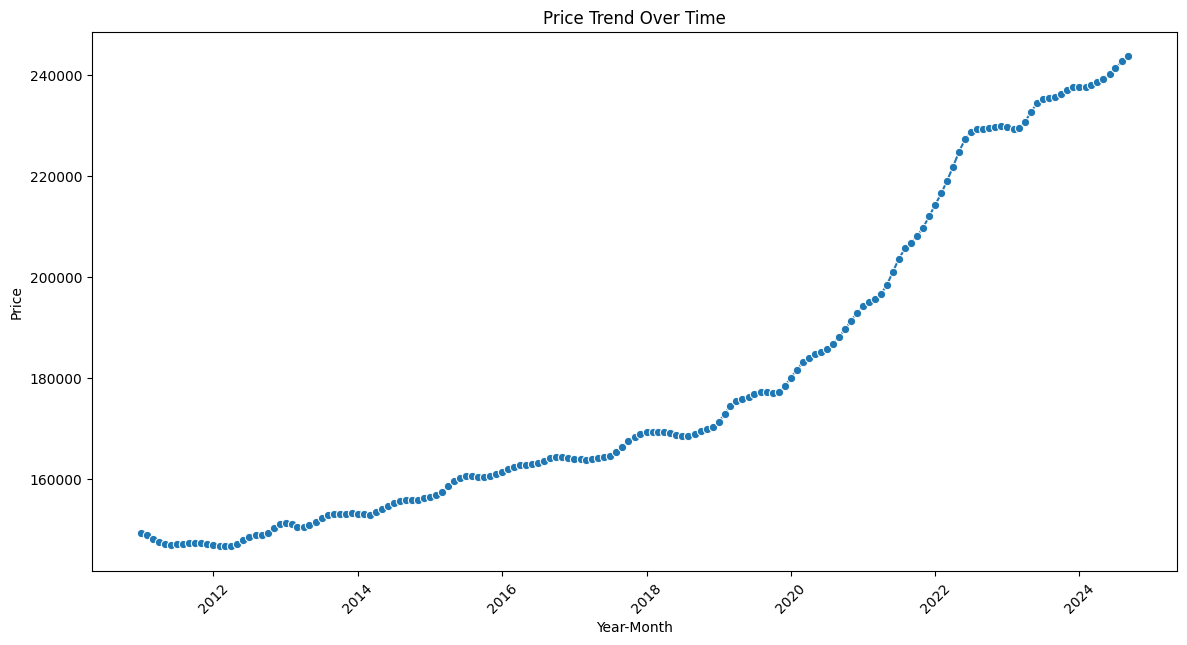

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


def get_prices_df(county):
    county_df = df_filtered[df_filtered["RegionName"] == county] 
    date_columns = county_df.columns[: len(county_df.columns) - 9]
    county_prices = county_df[date_columns].T

    # Rename the column to 'Price' and reset the index
    county_prices.columns = ["Price"]
    county_prices.index.name = "Date"
    county_prices.reset_index(inplace=True)

    # # Convert 'Date' to datetime, and strip the day to keep only year and month
    county_prices["Date"] = (
        pd.to_datetime(county_prices["Date"]).dt.to_period("M").dt.to_timestamp()
    )
    county_prices["Price"] = pd.to_numeric(county_prices["Price"]).fillna(0).astype(int)
    return county_prices

autauga_prices = get_prices_df("Autauga County")

# Plotting with Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x="Date", y="Price", data=autauga_prices, marker="o")
plt.title("Price Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [14]:
county = "Sacramento County"
prices_df = get_prices_df(county)
prices_df.to_csv(
    "./data/processed_zillow/" + county.replace(" ", "_") + ".csv", index=False
)

In [9]:
county = "Travis County"
prices_df = get_prices_df(county)
prices_df.to_csv(
    "./data/processed_zillow/" + county.replace(" ", "_") + ".csv", index=False
)